# Analysis of continuum collapse for $N_2$

In [1]:
from BigDFT import Logfiles as lf
import matplotlib.pyplot as plt

We show that the energy of the orbitals in the continuum region tend to collapse to zero when the size of the simulation box is increased. This phenomenon is known as the __continuum collapse__. We consider the $N_2$ molecule as an example. The system has 10 electrons (outside the core region), so there are 5 occupied orbitals. We have also computed 16 non occupied orbitals, so we have a total number of 21 orbitals.

In [2]:
nocc=5
norb = 21

We import the DFT results obtained for various values of rmult

In [3]:
logs = !ls testfiles/log-Continuum_Collapse/log-*
N2=[lf.Logfile(l) for l in logs]
nRuns=len(N2)
nRuns

8

We compute the density of states for each rmult and attribute the correct fermi level

In [6]:
dos=[run.get_dos() for run in N2]
for i,run in enumerate(N2):
    fl=run.evals[0][0][nocc-1]
    dos[i].fermi_level(fl,units='AU')

We can see the contiuum collapse at the level of the dos, the energy of the discrete orbitals remains stable as the simulation box is increased while the one if the orbitals in the contiuum region collapse to zero

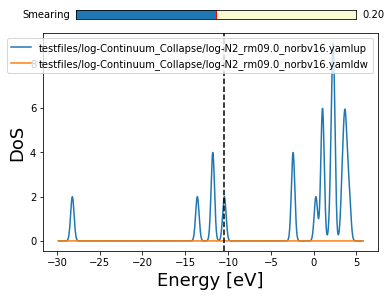

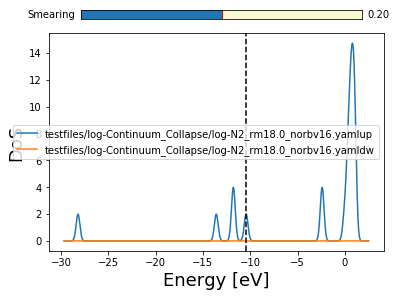

In [7]:
dos[0].plot()
dos[nRuns-1].plot()

We can also visualize the continuum collapse by plotting the energy of the highest continuum KS orbital vs. the dimension of the simulation box

In [8]:
eMax = []
dimBox = []
for i in range(nRuns):
    eMax.append(N2[i].evals[0][0][-1])
    dimBox.append(N2[i].log['Sizes of the simulation domain']['Angstroem'][0])

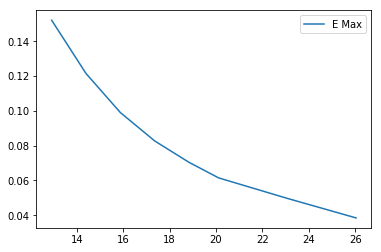

In [9]:
plt.plot(dimBox,eMax,label='E Max')
plt.legend()
plt.show()

We observe that the energy of the continuum orbitals tends to zero as the value of the simulation box is increased. So, if we want to cover a given energy range to sample the continuum region the number of the empty orbitals has to be increased. This is the continuum collapse.

It also interesting the plot the energy of all the orbitals as a function of the simulation box

In [10]:
Elist=[]
for n in range(norb):
    Eval=[]
    for ind in range(nRuns):
        Eval.append(N2[ind].evals[0][0][n])
    Elist.append(Eval)

In [11]:
Elist[20]

[0.15201562151937201,
 0.121416795524408,
 0.098999966977064396,
 0.082696965575093803,
 0.070393812771321299,
 0.061506877964728597,
 0.049729639497281701,
 0.038510585811065499]

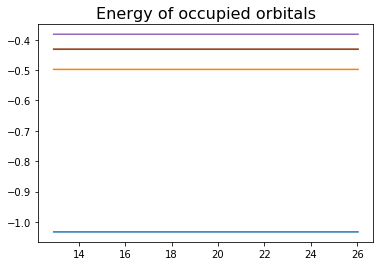

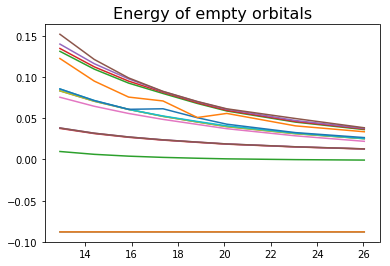

In [12]:
for n in range(nocc):
    plt.plot(dimBox,Elist[n])
plt.title('Energy of occupied orbitals',fontsize=16)
plt.show()

for n in range(nocc,norb):
    plt.plot(dimBox,Elist[n])
plt.title('Energy of empty orbitals',fontsize=16)
plt.show()